In [27]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def prob_dist(x, sigma, c = 0):
    return (1 / (sigma * math.sqrt(2 * math.pi))) * (math.e**((-(x - c)**2) / (2 * sigma**2)))

def generate_matrix(sigma, c = 0, tau = 6, n = 64):
    rows = math.ceil(tau * sigma) + 1
    cols = n
    probs = [prob_dist(0, sigma, c)]
    for v in range(1, rows):
        probs.append(2 * prob_dist(v, sigma, c))
    m = np.zeros((rows, cols))
    for row in range(rows):
        x = 0.5
        for col in range(cols):
            if probs[row] >= x:
                probs[row] -= x
                m[row][col] = 1
            x *= 0.5
    
    return m.astype(int).tolist()

def normalize(x):
    prob_sum = sum(list(x.values()))
    keys = list(x.keys())
    for key in keys:
        x[key] /= prob_sum
    return x

def infos(base_sampler):
    m = np.zeros((len(base_sampler), 64))
    for row in range(len(base_sampler)):
        x = 0.5
        for col in range(64):
            if base_sampler[row] >= x:
                base_sampler[row] -= x
                m[row][col] = 1
            x *= 0.5
    m = m.astype(int).tolist()
    sample_val = []
    for i in range(len(m)):
        print(m[i][:8])
        val = 0
        for j in range(8):
            val *= 2
            val += m[i][j]
        sample_val.extend([i] * val)
        m[i] = m[i][8:]
    print(sample_val)
    col_sums = []
    m_index = []
    for col in range(len(m[0])):
        col_sum = 0
        col_index = []
        for row in range(len(m)):
            col_sum += m[row][col]
            if m[row][col] == 1:
                col_index.append(row)
        while len(col_index) < len(m):
            col_index.append(0)
        col_sums.append(col_sum)
        m_index.append(col_index)
    print(col_sums)
    print(m_index)

第一题矩阵

In [2]:
m = generate_matrix(0.75, 0, 6, 64)
print(m)

[[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0

第二题矩阵

In [3]:
m = generate_matrix(1024, 6, 64)
m_ = np.zeros((64, 6145))
for col in range(64):
    pos = 0
    for row in range(6145):
        if m[row][col] == 1:
            m_[col][pos] = row
            pos += 1

In [11]:
for row in range(64):
    not_zero_mask = (m_[row] > 0)
    not_zero_count = np.sum(not_zero_mask)
    print(not_zero_count, end=", ")

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 990, 930, 1034, 1137, 1455, 1486, 1639, 1733, 1835, 1921, 2032, 2114, 2194, 2304, 2405, 2433, 2529, 2594, 2701, 2695, 2768, 2799, 2957, 2923, 3053, 3061, 3069, 3129, 3094, 3112, 3082, 3065, 3123, 3001, 3160, 3131, 3089, 3078, 3130, 3134, 3017, 3031, 3101, 3089, 3116, 3155, 3035, 3064, 3058, 3094, 3143, 3089, 3072, 3126, 

In [ ]:
m = m_.astype(int).tolist()
for row in range(64):
    m[row] = m[row][:3200]
print(m)

# 第三题

## 使用的离散半高斯分布

In [28]:
sigma = 1.5
left = -9
right = 11
base_sampler = {}
for i in range(1 - left):
    base_sampler[i] = prob_dist(i, sigma)
base_sampler = normalize(base_sampler)
print(base_sampler)

{0: 0.420173150660369, 1: 0.336448357435157, 2: 0.172738346377606, 3: 0.0568642523530410, 4: 0.0120024564648358, 5: 0.00162435584520366, 6: 0.000140952389294606, 7: 7.84230879283109e-6, 8: 2.79766471702556e-7, 9: 6.39922857382952e-9}


## 使用离散半高斯分布构建的双峰高斯分布

In [29]:
bg_prob = {}
for i in range(left, right):
    if(i <= 0):
        bg_prob[i] = 0.5 * base_sampler[-i]
    else:
        bg_prob[i] = 0.5 * base_sampler[i - 1]
bg_prob = normalize(bg_prob)
print(bg_prob)

{-9: 3.19961428691476e-9, -8: 1.39883235851278e-7, -7: 3.92115439641555e-6, -6: 0.0000704761946473028, -5: 0.000812177922601832, -4: 0.00600122823241789, -3: 0.0284321261765205, -2: 0.0863691731888030, -1: 0.168224178717578, 0: 0.210086575330185, 1: 0.210086575330185, 2: 0.168224178717578, 3: 0.0863691731888030, 4: 0.0284321261765205, 5: 0.00600122823241789, 6: 0.000812177922601832, 7: 0.0000704761946473028, 8: 3.92115439641555e-6, 9: 1.39883235851278e-7, 10: 3.19961428691476e-9}


## 第三题目标分布

In [30]:
target_prob = {}
for i in range(left, right):
    target_prob[i] = prob_dist(i, 1.5, c = 0.5)
target_prob = normalize(target_prob)
print(target_prob)

{-9: 5.18563204544342e-10, -8: 2.83125916433800e-8, -7: 9.91146343168362e-7, -6: 0.0000222472415973653, -5: 0.000320180434417809, -4: 0.00295456560799493, -3: 0.0174812593960209, -2: 0.0663180925293130, -1: 0.161313816348075, 0: 0.251588818465083, 1: 0.251588818465083, 2: 0.161313816348075, 3: 0.0663180925293130, 4: 0.0174812593960209, 5: 0.00295456560799493, 6: 0.000320180434417809, 7: 0.0000222472415973653, 8: 9.91146343168362e-7, 9: 2.83125916433800e-8, 10: 5.18563204544342e-10}


## 目标分布和离散双峰分布的图

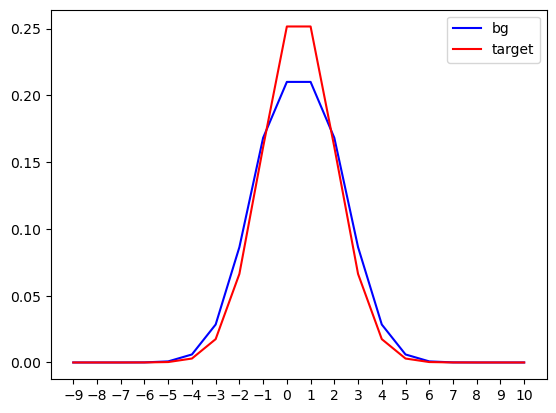

In [31]:
x_bg = list(bg_prob.keys())
y_bg = list(bg_prob.values())
x_target = list(target_prob.keys())
y_target = list(target_prob.values())
f_bg = interp1d(x_bg, y_bg, kind='cubic')
f_target = interp1d(x_target, y_target, kind='cubic')
x_bg_new = np.linspace(min(x_bg), max(x_bg), 300)
y_bg_new = f_bg(x_bg_new)
x_target_new = np.linspace(min(x_target), max(x_target), 300)
y_target_new = f_target(x_target_new)
plt.plot(x_bg, y_bg, color='blue', label='bg')
plt.plot(x_target, y_target, color='red', label='target')
plt.xticks(range(min(min(x_bg), min(x_target)), max(max(x_bg), max(x_target)) + 1, 1))
plt.legend()
plt.show()

## 离散半高斯分布各点的概率展开及其他编程信息

In [32]:
infos(base_sampler)

[0, 1, 1, 0, 1, 0, 1, 1]
[0, 1, 0, 1, 0, 1, 1, 0]
[0, 0, 1, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

# 第四题

## 使用的离散半高斯分布

In [71]:
sigma_max = 1.6
sigma_min = 0.8
left = -9
right = 11
base_sampler = {}
for i in range(1 - left):
    base_sampler[i] = prob_dist(i, sigma_max)
base_sampler = normalize(base_sampler)
print(base_sampler)

{0: 0.399153377109599, 1: 0.328334611966009, 2: 0.182745732504581, 3: 0.0688226734639126, 4: 0.0175375754356234, 5: 0.00302385723576937, 6: 0.000352782255191431, 7: 0.0000278487623572912, 8: 1.48750619895140e-6, 9: 5.37607584814554e-8}


## 使用离散半高斯分布构建的双峰高斯分布

In [72]:
bg_prob = {}
for i in range(left, right):
    if(i <= 0):
        bg_prob[i] = 0.5 * base_sampler[-i]
    else:
        bg_prob[i] = 0.5 * base_sampler[i - 1]
bg_prob = normalize(bg_prob)
print(bg_prob)

{-9: 2.68803792407277e-8, -8: 7.43753099475702e-7, -7: 0.0000139243811786456, -6: 0.000176391127595715, -5: 0.00151192861788469, -4: 0.00876878771781169, -3: 0.0344113367319563, -2: 0.0913728662522903, -1: 0.164167305983004, 0: 0.199576688554800, 1: 0.199576688554800, 2: 0.164167305983004, 3: 0.0913728662522903, 4: 0.0344113367319563, 5: 0.00876878771781169, 6: 0.00151192861788469, 7: 0.000176391127595715, 8: 0.0000139243811786456, 9: 7.43753099475702e-7, 10: 2.68803792407277e-8}


## 第四题目标分布及分布图

{-9: 8.05069107663194e-10, -8: 3.30612616235886e-8, -7: 9.18220836585885e-7, -6: 0.0000172471097232560, -5: 0.000219092227103835, -4: 0.00188225766773774, -3: 0.0109363560553454, -2: 0.0429741869148501, -1: 0.114204747239671, 0: 0.205258951743629, 1: 0.249494810953635, 2: 0.205098455331843, 3: 0.114026218742981, 4: 0.0428734583803663, 5: 0.0109021906605428, 6: 0.00187491027708165, 7: 0.000218066356616636, 8: 0.0000171529296622896, 9: 9.12492717487617e-7, 10: 3.28293261539357e-8}
{-9: 0.0119863651452104, -8: 0.0177901810092028, -7: 0.0263913115365540, -6: 0.0391317547468890, -5: 0.0579943140185425, -4: 0.0859071382019988, -3: 0.127192302998020, -2: 0.188226234094061, -1: 0.278411531145549, 0: 0.411606313309582, 1: 0.500312597595072, 2: 0.499994758227443, 3: 0.499432968551646, 4: 0.498628051362976, 5: 0.497581184464214, 6: 0.496293897793704, 7: 0.494768069699440, 8: 0.493005922371856, 9: 0.491010016450848, 10: 0.488783244825368}


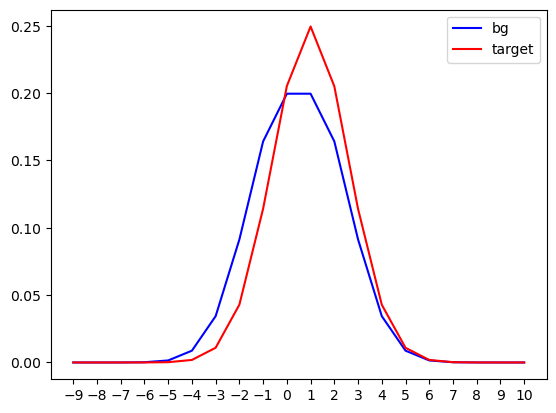

In [73]:
target_sigma = 1.599
target_center = 0.999
target_prob = {}
for i in range(left, right):
    target_prob[i] = prob_dist(i, target_sigma, c = target_center)
target_prob = normalize(target_prob)
print(target_prob)
accept_rate = {}
for key in list(target_prob.keys()):
    p = -(key - target_center)**2 / (2 * target_sigma**2)
    if key <= 0:
        p += key**2 / (2 * sigma_max**2)
    else:
        p += (key - 1)**2 / (2 * sigma_max**2)
    p = (sigma_min / target_sigma) * e**p
    accept_rate[key] = p
print(accept_rate)

x_bg = list(bg_prob.keys())
y_bg = list(bg_prob.values())
x_target = list(target_prob.keys())
y_target = list(target_prob.values())
f_bg = interp1d(x_bg, y_bg, kind='cubic')
f_target = interp1d(x_target, y_target, kind='cubic')
x_bg_new = np.linspace(min(x_bg), max(x_bg), 300)
y_bg_new = f_bg(x_bg_new)
x_target_new = np.linspace(min(x_target), max(x_target), 300)
y_target_new = f_target(x_target_new)
plt.plot(x_bg, y_bg, color='blue', label='bg')
plt.plot(x_target, y_target, color='red', label='target')
plt.xticks(range(min(min(x_bg), min(x_target)), max(max(x_bg), max(x_target)) + 1, 1))
plt.legend()
plt.show()

## 离散半高斯分布各点的概率展开及其他编程信息

In [70]:
infos(base_sampler)

[0, 1, 1, 0, 0, 1, 1, 0]
[0, 1, 0, 1, 0, 1, 0, 0]
[0, 0, 1, 0, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,